In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

In [3]:
# Загружаем датасет
df = pd.read_csv('S05-hw-dataset.csv')

# Первые строки
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
# Информация о колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [8]:
# Описательная статистика
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [9]:
# Распределение таргета
print("Распределение таргета 'default':")
print(df['default'].value_counts(normalize=True))

Распределение таргета 'default':
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


In [17]:
# Удаляем client_id (если есть)
if 'client_id' in df.columns:
    df = df.drop(columns=['client_id'])

# X — все колонки, кроме 'default', y — таргет
X = df.drop(columns=['default'])
y = df['default']

# Проверим типы
print("Типы признаков:")
print(X.dtypes.unique())

Типы признаков:
[dtype('int64') dtype('float64')]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # сохраняем баланс классов
)

print(f"Размер train: {X_train.shape}, test: {X_test.shape}")

Размер train: (2400, 15), test: (600, 15)


In [18]:
# Бейзлайн: всегда предсказывает самый частый класс
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print(f"DummyClassifier:")
print(f"Accuracy: {acc_dummy:.4f}")
print(f"ROC-AUC:  {auc_dummy:.4f}")

DummyClassifier:
Accuracy: 0.5900
ROC-AUC:  0.5000


In [19]:
# Pipeline: масштабирование + логистическая регрессия
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

acc_logreg = accuracy_score(y_test, y_pred_logreg)
auc_logreg = roc_auc_score(y_test, y_proba_logreg)

print(f"LogisticRegression:")
print(f"Accuracy: {acc_logreg:.4f}")
print(f"ROC-AUC:  {auc_logreg:.4f}")

LogisticRegression:
Accuracy: 0.8000
ROC-AUC:  0.8756


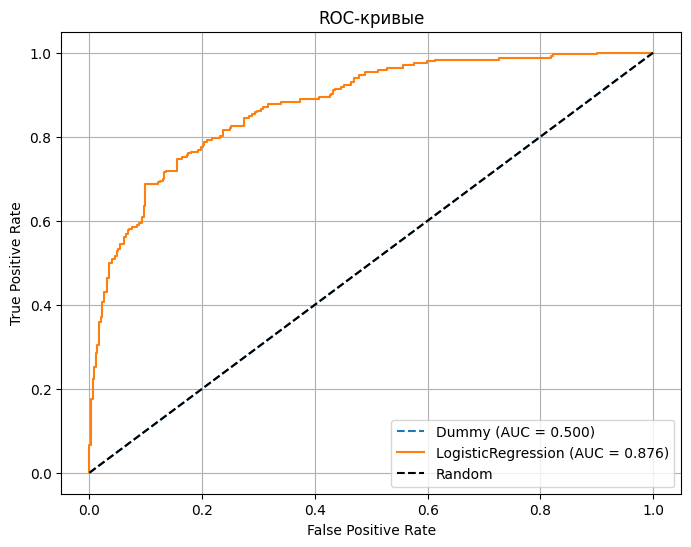

In [14]:
plt.figure(figsize=(8, 6))

# ROC для Dummy
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy (AUC = {auc_dummy:.3f})', linestyle='--')

# ROC для LogisticRegression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'LogisticRegression (AUC = {auc_logreg:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend()
plt.grid(True)

# Сохраняем
plt.savefig('figures/roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()